### Part 3: PCA

In [1]:
import pandas as pd  
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [2]:
features = [
     #'Channel',
     #'Region',
     'Fresh',
     'Milk',
     'Grocery',
     'Frozen',
     'Detergent',
     'Deli']

In [3]:
df = pd.read_csv(r'C:\Users\hema-sunroom\Desktop\customer_segmentation/data_processed.csv', index_col = 0)

In [5]:
data = df[features].to_numpy()
data.shape

(440, 6)

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:,0].std()

1.0

In [7]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
np.save(r'C:\Users\hema-sunroom\Desktop\customer_segmentation/training_data', data)

In [9]:
pca = PCA(n_components = 2)
res_pca = pca.fit_transform(data)

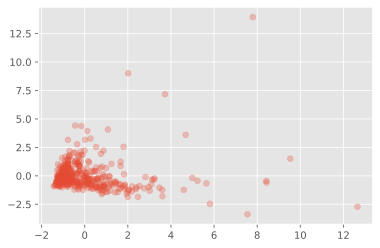

In [11]:
plt.scatter(res_pca[:, 0], res_pca[:, 1], alpha=0.3)

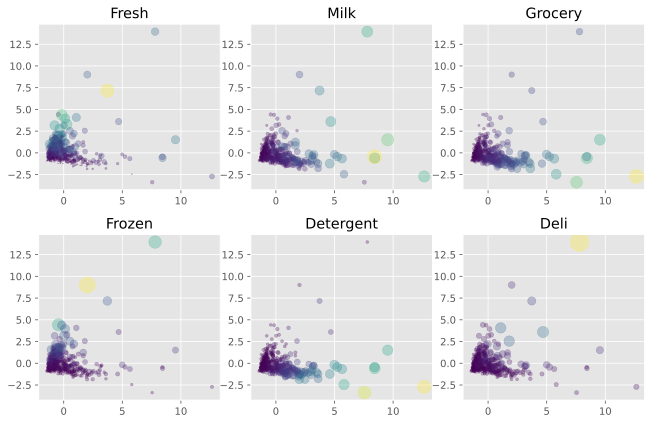

In [14]:
fig, axes = plt.subplots(2,3, figsize = (9,6))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    cols = df[feature]
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s = sizes, c = cols, cmap = cmap, alpha=0.3)
    ax.set_title(feature)
plt.tight_layout()

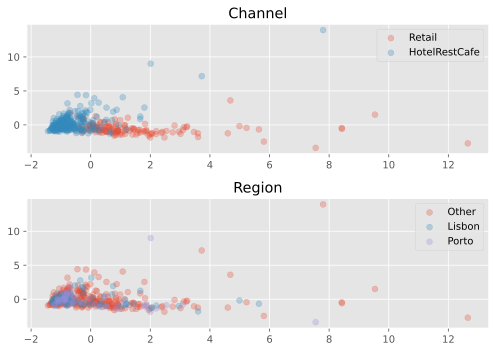

In [17]:
fig, axes = plt.subplots(2,1, figsize = (7,5))

for feature, ax in zip(['Channel', 'Region'], axes.ravel()):
    cmap = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(
            res_pca[df[feature]==unique_val, 0],
            res_pca[df[feature]==unique_val, 1],
            label=unique_val, alpha=0.3)
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()